![CDS 411 logo](../../img/cds-411-logo.png)

# Class 12: System dynamics models: Damped oscillator and bungee jumping II

---

![CC BY-SA 4.0 license](../../img/cc-by-sa.png)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

## Load packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## The physics of springs

### Newton's Second Law

\begin{equation}
m\dfrac{dv}{dt}=\sum{}F
\end{equation}

### Hooke's Law

\begin{equation}
F_{\text{spring}}=-kx
\end{equation}

### Equation of motion

\begin{equation}
m\dfrac{dv}{dt}=k(x-x_{eq})
\end{equation}

## System dynamics diagram

<img src="../../img/undamped_oscillator_diagram.svg" width="600px">

## Forward Euler method

<img src="../../img/forward_euler_method.svg" width="600px">

* Two stocks instead of one
* The numerical method we've been using, the (forward) Euler method, states that each stock should be updated at the same time within each simulation step
* It's worked so far!

### Constants

In [2]:
# related to time steps
sim_time = 5.0  # s
delta_t = 0.01 # s
sim_steps = int(sim_time / delta_t)

In [3]:
# related to spring weight
mass = 0.2  # kg
spring_constant = 10  # N/m
gravity_acceleration = -9.81  # m/s^2
weight = mass * gravity_acceleration  # N

In [4]:
# related to spring length
unweighted_length = 1.000  # m
weight_displacement = 1.962 / 10 # m
weighted_length = unweighted_length + weight_displacement  # m
init_displacement = 0.3  # m

In [5]:
# initialize stocks
length = weighted_length + init_displacement  # m
velocity = 0  # m/s

### Simulation history

In [6]:
trace = [[0, length, 0]]  # step_index, length, velocity

### Algorithm: Forward Euler method

In [7]:
for step_index in range(1, sim_steps + 1):
    restoring_spring_force = spring_constant * (length - unweighted_length)
    total_force = restoring_spring_force + weight
    acceleration = total_force / mass

    length += -velocity * delta_t
    velocity += delta_t * acceleration

    trace.append([step_index, length, velocity])

### Convert results to data frame

In [8]:
simulation_df = pd.DataFrame({
    "time": [x[0] * delta_t for x in trace],
    "length": [x[1] for x in trace],
    "velocity": [x[2] for x in trace],
    "method": "forward_euler",
})

### Visualization

In [9]:
figwidth = 5  # inches
figheight = 0.618 * figwidth  # golden ratio
figsize = (figwidth, 1.5 * figheight)

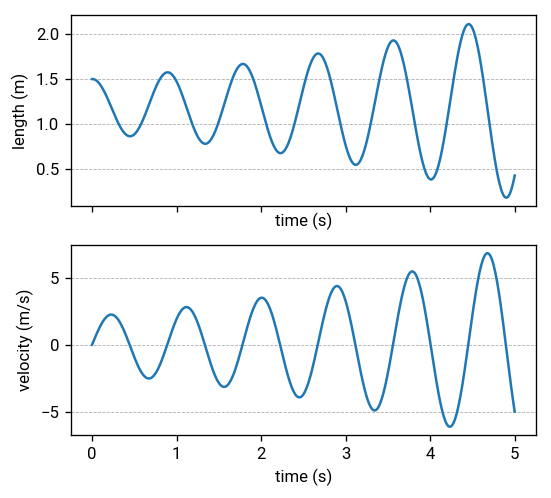

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=figsize, dpi=120, sharex=True)
ax[0].plot(simulation_df["time"], simulation_df["length"], "-")
ax[1].plot(simulation_df["time"], simulation_df["velocity"], "-")
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("length (m)")
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("velocity (m/s)");

---

## Mid-point method

<img src="../../img/midpoint_euler_method_schematic.png" width="600px">

### Constants

In [11]:
sim_time = 5.0  # s
delta_t = 0.01 # s
sim_steps = int(sim_time / delta_t)

mass = 0.2  # kg
spring_constant = 10  # N/m
gravity_acceleration = -9.81  # m/s^2
weight = mass * gravity_acceleration

unweighted_length = 1.000  # m
weight_displacement = 1.962 / 10 # m
weighted_length = unweighted_length + weight_displacement
init_displacement = 0.3  # m

length = weighted_length + init_displacement  # m
velocity = 0

### Simulation history

In [12]:
trace = [[0, length, 0]]

### Algorithm

In [13]:
for step_index in range(1, sim_steps + 1):
    velocity_old = velocity
    acceleration = (spring_constant * (length - unweighted_length) + weight) / mass
    velocity_half_step = velocity_old + acceleration * (delta_t / 2)
    length_half_step = length - velocity_old * (delta_t / 2)
    
    acceleration_half_step = (spring_constant * (length_half_step - unweighted_length) + weight) / mass
    
    velocity += acceleration_half_step * delta_t
    length += -velocity_half_step * delta_t
    trace.append([step_index, length, velocity])

### Convert results to data frame

In [14]:
simulation_df_midpoint = pd.DataFrame({
    "time": [x[0] * delta_t for x in trace],
    "length": [x[1] for x in trace],
    "velocity": [x[2] for x in trace],
    "method": "midpoint_euler",
})

### Visualization

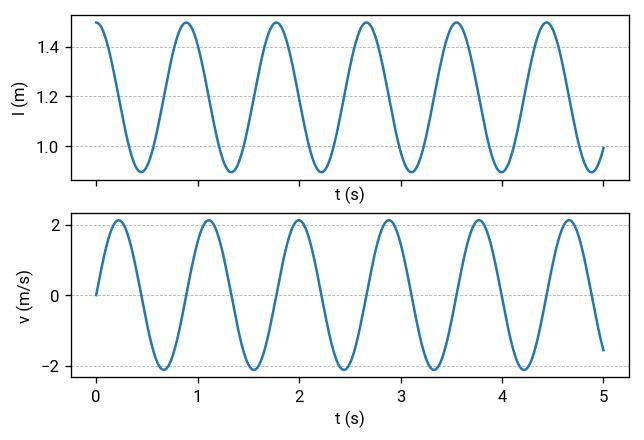

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, dpi=120, sharex = True)
ax[0].plot(simulation_df_midpoint["time"], simulation_df_midpoint["length"], "-")
ax[1].plot(simulation_df_midpoint["time"], simulation_df_midpoint["velocity"], "-")
ax[0].set_xlabel("t (s)")
ax[0].set_ylabel("l (m)")
ax[1].set_xlabel("t (s)")
ax[1].set_ylabel("v (m/s)");

## Leapfrog method

<img src="../../img/leapfrog_method.gif" width="600px">

Source: https://www.physics.drexel.edu/students/courses/Comp_Phys/Integrators/leapfrog/

### Constants

In [16]:
sim_time = 5.0  # s
delta_t = 0.01 # s
sim_steps = int(sim_time / delta_t)

mass = 0.2  # kg
spring_constant = 10  # N/m
gravity_acceleration = -9.81  # m/s^2
weight = mass * gravity_acceleration

unweighted_length = 1.000  # m
weight_displacement = 1.962 / 10 # m
weighted_length = unweighted_length + weight_displacement
init_displacement = 0.3  # m

length = weighted_length + init_displacement  # m
acceleration = (spring_constant * (length - unweighted_length) + weight) / mass
velocity = 0 - acceleration * delta_t / 2

### Simulation history

In [17]:
trace_length = [[0, length]]
trace_velocity = [[0, velocity]]

### Algorithm

In [18]:
for step_index in range(1, sim_steps + 1):
    restoring_spring_force = spring_constant * (length - unweighted_length)
    total_force = restoring_spring_force + weight
    acceleration = total_force / mass
    velocity += delta_t * acceleration
    length += -velocity * delta_t
    trace_length.append([step_index, length])
    trace_velocity.append([step_index, velocity])

### Convert results to data frame

In [19]:
simulation_df_leapfrog = pd.merge(
    pd.DataFrame({
        "time": [x[0] * delta_t for x in trace_length],
        "length": [x[1] for x in trace_length],
        "method": "leapfrog",
    }),
    pd.DataFrame({
        "time": [(x[0] - 0.5) * delta_t for x in trace_velocity],
        "velocity": [x[1] for x in trace_velocity],
        "method": "leapfrog",
    }),
    how="outer",
)

### Visualization

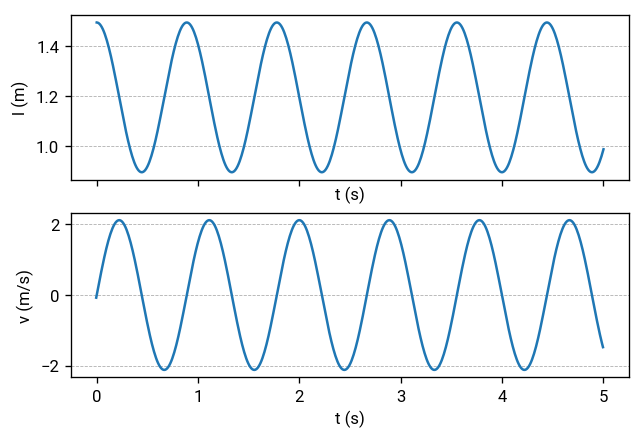

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, dpi=120, sharex = True)
ax[0].plot(simulation_df_leapfrog["time"], simulation_df_leapfrog["length"], "-")
ax[1].plot(simulation_df_leapfrog["time"], simulation_df_leapfrog["velocity"], "-")
ax[0].set_xlabel("t (s)")
ax[0].set_ylabel("l (m)")
ax[1].set_xlabel("t (s)")
ax[1].set_ylabel("v (m/s)");

## Compare methods

Join tables

In [21]:
simulation_df_new = pd.concat(
    [simulation_df[["time", "length", "velocity", "method"]],
     simulation_df_midpoint[["time", "length", "velocity", "method"]],
     simulation_df_leapfrog[["time", "length", "velocity", "method"]]],
    ignore_index=True
)

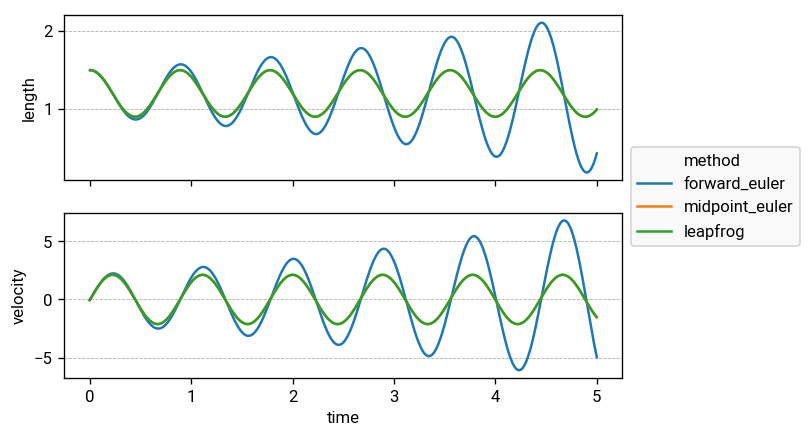

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1, dpi=120, sharex=True)
sns.lineplot(x="time", y="length", hue="method", data=simulation_df_new, ax=ax[0], legend=False)
sns.lineplot(x="time", y="velocity", hue="method", data=simulation_df_new, ax=ax[1])
ax[1].legend(loc='center left', bbox_to_anchor=(1, 1.1));

## Bungee jump model (no drag)

### Constants

We update some of the constants to better match the real-life situation of a person performing a bungee jump.

In [23]:
sim_time = 60.0  # s
delta_t = 0.01 # s
sim_steps = int(sim_time / delta_t)

mass = 80  # kg
spring_constant = 6  # N/m
gravity_acceleration = -9.81  # m/s^2
weight = mass * gravity_acceleration

unweighted_length = 30  # m
weight_displacement = np.abs(mass * gravity_acceleration) / spring_constant # m
weighted_length = unweighted_length + weight_displacement
init_displacement = 0.0  # m

length = 0  # m
acceleration = (spring_constant * (length - unweighted_length) + weight) / mass
velocity = 0 - acceleration * delta_t / 2

### Simulation history

In [24]:
trace_length = [[0, length]]
trace_velocity = [[0, velocity]]

### Algorithm

In [25]:
for step_index in range(1, sim_steps + 1):
    if length > unweighted_length:
        restoring_spring_force = spring_constant * (length - unweighted_length)
    else:
        restoring_spring_force = 0

    total_force = restoring_spring_force + weight
    acceleration = total_force / mass
    velocity += delta_t * acceleration
    length += -velocity * delta_t
    trace_length.append([step_index, length])
    trace_velocity.append([step_index, velocity])

### Convert results to data frame

In [26]:
simulation_df_bungee = pd.merge(
    pd.DataFrame({
        "time": [x[0] * delta_t for x in trace_length],
        "length": [x[1] for x in trace_length],
        "simulation": "bungee",
    }),
    pd.DataFrame({
        "time": [(x[0] - 0.5) * delta_t for x in trace_velocity],
        "velocity": [x[1] for x in trace_velocity],
        "simulation": "bungee",
    }),
    how="outer",
)

### Visualization

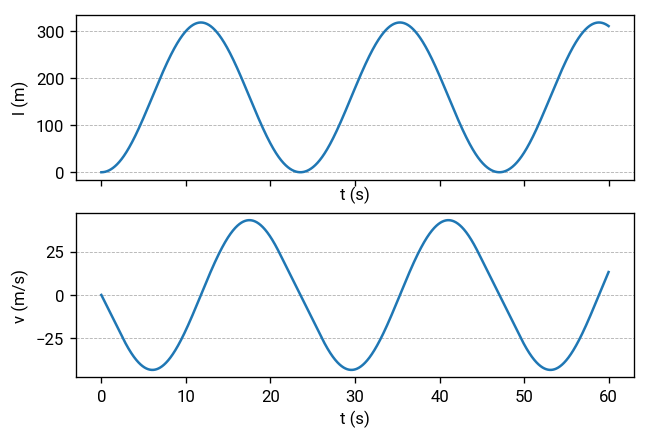

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=1, dpi=120, sharex = True)
ax[0].plot(simulation_df_bungee["time"], simulation_df_bungee["length"], "-")
ax[1].plot(simulation_df_bungee["time"], simulation_df_bungee["velocity"], "-")
ax[0].set_xlabel("t (s)")
ax[0].set_ylabel("l (m)")
ax[1].set_xlabel("t (s)")
ax[1].set_ylabel("v (m/s)");

### Undamped oscillator model

For comparison, we first run the simulation as an undamped oscillator. We will visualize this alongside the bungee model.

In [28]:
import undamped_oscillator

In [29]:
simulation_df_undamped = undamped_oscillator.simulation(
    sim_time=60.0,
    delta_t=0.01,
    mass=80,
    spring_constant=6,
    unweighted_length=30,
    init_displacement=-160.8,
    method="leapfrog",
)

## Compare methods

Join tables

In [30]:
simulation_df_undamped["simulation"] = "undamped spring"
simulation_df_new = pd.concat(
     [simulation_df_bungee[["time", "length", "velocity", "simulation"]],
      simulation_df_undamped[["time", "length", "velocity", "simulation"]]],
    ignore_index=True
)

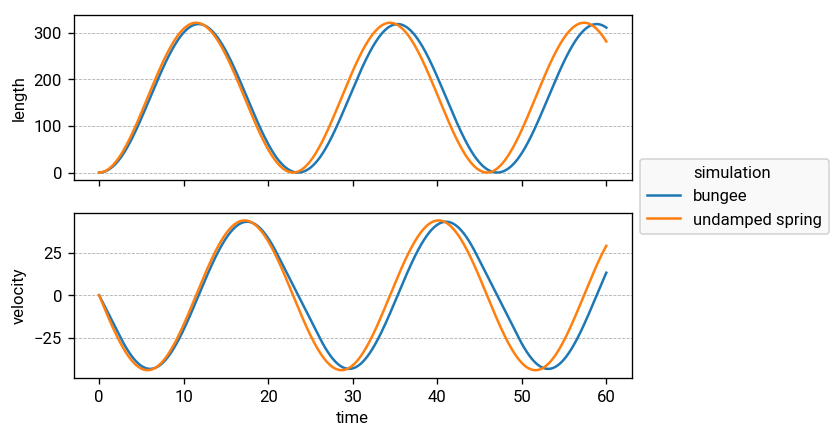

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, dpi=120, sharex=True)
sns.lineplot(x="time", y="length", hue="simulation", data=simulation_df_new, ax=ax[0], legend=False)
sns.lineplot(x="time", y="velocity", hue="simulation", data=simulation_df_new, ax=ax[1])
ax[1].legend(loc='center left', bbox_to_anchor=(1, 1.1));